<a href="https://colab.research.google.com/github/Molvilada/Aprendizaje-de-maquina/blob/main/Entregable_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Entregable 1**
**Nombre:** Laura Daniela Molina Villar


---



### **1.** XOR en Neuronas MP

Para poder gráficar XOR en Neuronas MP debemos definir dos funciones: \\

$f(x)= \left\{ \begin{array}{lcc}
            1 &   si  & g(x) \geq \theta \\
            0 &   si  & g(x) < \theta \\
             \end{array}
   \right.$


$f'(x)= \left\{ \begin{array}{lcc}
            1 &   si  & g(x) < \theta \\
            0 &   si  & g(x) \geq \theta \\
             \end{array}
   \right.$

Recordemos que g(x) es la sumatoria de los valores $x_i$. En este caso las neuronas rojas funcionas con f'(x) y las neuronas azules con f(x). Las neuronas rojas representan un NOT, las neuronas azules con $\theta \geq 2$ representan un AND, y finalmente las neuronas azules con $\theta \geq 1$ representan un OR. \\


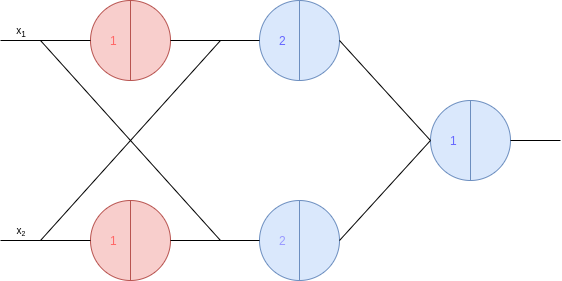

### **2.** ¿Para qué sirve $\frac{ ||\theta||^2 }{ \gamma^2 }$ y por qué es importante para el problema?

Haciendo un pequeño calculo podemos observar que: 

$cos(\theta^*, \theta^k) \geq \frac{ k\gamma }{||\theta^*|| \sqrt {kR^2}}$ \\
$cos^2(\theta^*, \theta^k) \geq \frac{ k^2\gamma^2 }{||\theta^*||^2 {kR^2}}$ \\
Pero sabemos que $cos^2(\theta^*, \theta^k)$ no puede ser mayor a 1, por lo tanto \\
$1 \geq \frac{ k\gamma^2 }{||\theta^*||^2 {R^2}}$ \\
Reorganizando la desigualdad \\
$\frac{ ||\theta^*||^2  }{ \gamma^2 } \geq \frac{ k }{R^2}$ \\

Por lo tanto podemos concluir que $\frac{ ||\theta||^2 }{ \gamma^2 }$ límita la cantidad k de iteraciones del problema (teniendo en cuenta que $R^2$ es una constante preferiblemente pequeña). Tomemos R = 1, que es un número pequeño, en este caso si $\frac{ ||\theta||^2 }{ \gamma^2 }$ es grande significa que k  podría llegar a ser así de grande. Como k es la cantidad de iteraciones, entre más grande, más complejo se vuelve el problema. Contrario a si $\frac{ ||\theta||^2 }{ \gamma^2 }$ es pequeño, pues límita el valor de k a un valor pequeño, lo que disminuye la dificultad del problema.

### **3.** Ejercicio 1.2 del libro
*a.* Todas aquellas que puedan tener que ver con viagra, herencias o donaciones de personas millonarias, por lo tanto: herencia, donación, millones, dólares. Correos sobre ser el ganador de algo, por lo tanto: ganador/a, premio, recompensa.

*b.* Por ejemplo las relacionadas con citas médicas: cita, médica, doctor/a, eps, sisben. Los correos relacionados pedidos hechos por internet: pedido, código, entrega.

*c.* El bias escogido, ya que dependiendo de su cantidad serán clasificados más o menos mensajes como spam.

### **4.** Ejercicio 1.3 del libro
*a.* y(t) tiene dos posibles valores, +1 y -1. Ahora recordemos que $w^T(t)x(t) = \sum_{i=1}^d{w_i*x_i + b}$, con dos valores posibles $w^T(t)x(t) > 0$, dando como resultado $sign(w^T(t)x(t)) = 1$ o  $w^T(t)x(t) < 0$, dando como resultado $sign(w^T(t)x(t)) = -1$. Entonces si $w^T(t)x(t)$ clasificó mal, significa que $sign(w^T(t)x(t))$ tendrá el valor de -y(t), por lo tanto $w^T(t)x(t)$ tendrá el signo contrario a y(t) (ya que si y(t) = 1, entonces $w^T(t)x(t) < 0$, pero si y(t) = -1, entonces $w^T(t)x(t) > 0$). Al tener signos contrarios eso dará como resultado un número menor a 0.

*b.* Tenemos que \\
$y(t)w^T(t+1)x(t) = y(t)(w(t) + y(t)x(t))^T x(t)$ \\
$y(t)w^T(t+1)x(t) = y(t)(w(t)^T + y(t)x(t)^T) x(t)$ \\
$y(t)w^T(t+1)x(t) = y(t)w(t)^T x(t) + y(t)y(t)x(t)^T x(t)$ \\
Por lo tanto  $y(t)w^T(t+1)x(t) > y(t)w(t)^T x(t)$ 

*c.* Tenemos que \\
$w^T(t+1) = w(t) + y(t)x(t)$ \\
$w^T(t+1)x(t) = w(t)x(t) + y(t)x(t)x(t)$ \\
Con $x(t)x(t)$ positivo.

Recordemos que dependiendo del valor de $w^T(t)x(t)$ la función $sign(w^T(t)x(t))$ arroja un resultado, que es comparado con y(t). Si x(t) fue bien clasificado, w(t) no se actualiza, pero cuando es mal clasificado tenemos dos opciones:
* y(t) = 1 y $w^T(t)x(t) < 0$. En este caso $w^T(t+1)$ va a aumentar una cantidad $x(t)x(t)$, acercando mucho más $w^T(t)x(t)$ a un valor positivo, que es lo que buscamos en este caso.
* y(t) = -1 y $w^T(t)x(t) > 0$. En este caso $w^T(t+1)$ va a disminuir una cantidad $x(t)x(t)$, acercando mucho más $w^T(t)x(t)$ a un valor negativo, que es lo que buscamos en este caso.


### **5.** Ejercicio 1.10 del libro

In [ ]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
import math

In [ ]:
def experiment(coins, flips):    
    
  v1 = vrand = 0
  vfirst = 1

  # Moneda escogida al azar
  crand = int(random()*coins)

  for i in range(coins):
    cantHeads = 0
    for j in range(flips):
      if random() > 0.5:
        cantHeads += 1    
    v = cantHeads / flips
    if i == 0:
      v1 = v
    elif i == crand:
      vrand = v
    if v < vfirst:
      vfirst = v

  return [v1, vrand, vfirst]
      

*a.* $\mu$ es 0.5 para cualquiera de las 3 monedas, ya que se supone son "justas".

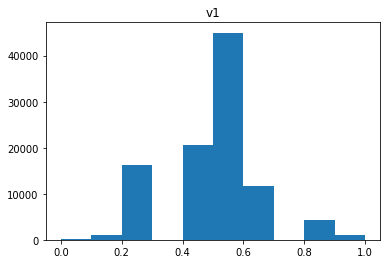

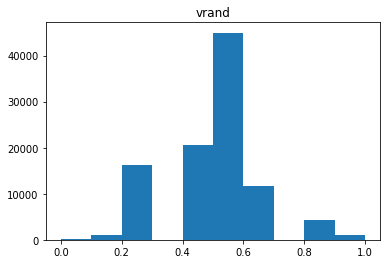

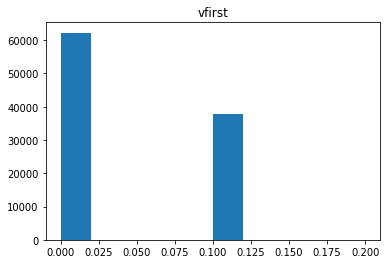

In [ ]:
# Punto b

n = 100000
coins = 1000
flips = 10
v1Arr = np.array([])
vrandArr = np.array([])
vfirstArr = np.array([])

for i in range(n):
  vArr = experiment(coins, flips)
  v1Arr = np.append(v1Arr, vArr[0])
  vrandArr = np.append(vrandArr, vArr[1])
  vfirstArr = np.append(vfirstArr, vArr[2])

n_bins = 10
plt.hist(v1Arr, bins = n_bins)
plt.title("v1")
plt.show()
plt.hist(vrandArr, bins = n_bins)
plt.title("vrand")
plt.show()
plt.hist(vfirstArr, bins = n_bins)
plt.title("vfirst")
plt.show()

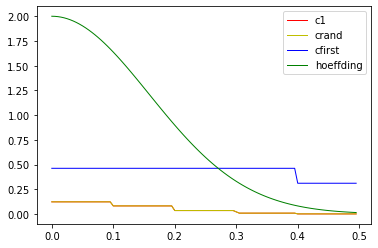

In [ ]:
# Punto c
def hoeffdingInequality(N, eps):
    return 2.0*math.exp(-2.0*N*eps**2)


eps = np.arange(0.0,0.5,0.005)
epsv1Prob = np.zeros(eps.size) 
epsrandProb = np.zeros(eps.size)
epsfirstProb = np.zeros(eps.size) 
hoeffdingArr = np.zeros(eps.size)
mu = 0.5
v1abs = np.abs(v1Arr - mu)
vrandabs = np.abs(vrandArr - mu)
vfirstabs = np.abs(vfirstArr - mu)

for i in range(eps.size):
  epsv1Prob[i] = np.sum(v1abs, where=v1abs>eps[i]) / n
  epsrandProb[i] = np.sum(vrandabs, where=vrandabs>eps[i]) / n
  epsfirstProb[i]  = np.sum(vfirstabs, where=vfirstabs>eps[i]) / n
  hoeffdingArr[i] = hoeffdingInequality(flips, eps[i])

plt.plot(eps, epsv1Prob, color='r', linewidth=1, label='c1')
plt.plot(eps, epsrandProb, color='y', linewidth=1, label='crand')
plt.plot(eps, epsfirstProb, color='b', linewidth=1, label='cfirst')
plt.plot(eps, hoeffdingArr, color='g', linewidth=1, label='hoeffding')
plt.legend()


*d.* c1 y crand cumplen con la cota de Hoeffding, pero cfirst no la cumple. Pensemos en c1, crand y cfirst como funciones h del conjunto de hipotesis H, para que se cumpla la cota de Hoeffding, h debe ser fijado antes de generar el conjunto de datos, pero cfirst fue cambiando su valor a lo largo del experimento, es por ello que no se cumplió en ese caso la cota.

*e.* En todo el problema hay un total de 1000 contenedores, cada contenedor es cada una de las 1000 monedas que se tomaron en cuenta. Son contenedores que tienen dos clases de bolitas, "cara" y "sello". El problema con cfirst es que es un contenedor que va cambiando a lo largo del experimento, ya que es aquel contenedor con la menor cantidad de caras, pero los contenedores usados deben ser fijados antes de generar el conjunto de datos, es por ello que se afecta la cota de Hoeffding

### **6.** Ejercicio 1.11 del libro

a. Supongamos que f estuviera conformado por 25 x's con y(x) = -1 y todas las demás (supongamos que más de 25 + 1) x's con y(x) = 1. Ahora supongamos que la muestra recogida D está conformada únicamente por las 25 x's con y(x) = -1, como el algoritmo S depende de los datos recogidos en la muestra, S escogerá la hipétesis h2, lo cuál no describiría correctamente lo que pasa en f. Por otro lado al escoger un h aleatorio, hay un 50% de posibilidades de escoger a h1, que en este caso describe mucho mejor lo que sucede en f. Por lo tanto no se puede garantizar que S siempre escogerá la hipotesis h que se comporte mejor.

b. Si es posible, es parecido a lo planteado arriba, solo que en este caso D escogería h1, siendo h2 el más parecido, y C tendría el 50% de posibilidades de escoger h2.

c. Como todos los ejemplos en D tienen yn = +1, S siempre escogerá a h1, y como p = 0.9, entonces h1 es la hipótesis que mejor describe a f. Por el contrario C escogerá un h al azar, es decir que solo tiene un 50% de probabilidades de escoger h1. Como S tiene un 100% de probabilidad de acertar la hipótesis correcta y C solo un 50%, S tiene un 50% más de probabilidad que C de escoger una mejor hipótesis.

d. Cuando p = 0.5, ya que la hipótesis que escoja C, h1 o h2, describe bien a f (pues hay igual cantidad de x's con y(x) = 1 y y(x) = -1) por el contrario S dependerá de la muestra recolectada.